# Capstone - Part 1. Initial Data Clean-up - Dmitri Kazanski

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time  

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV

In [2]:
data = pd.read_csv(r"C:\Users\dkaza\Documents\0 Berkeley - ML and AI\0_Capstone\kaden_sample_data.csv");

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 78 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   request_device_id                     object 
 1   request_last_seen_os                  object 
 2   request_os_version                    object 
 3   request_make                          object 
 4   request_model                         object 
 5   request_form_factor                   object 
 6   request_source                        int64  
 7   request_country                       object 
 8   request_placement_id                  object 
 9   request_publisher_id                  object 
 10  request_publisher                     object 
 11  request_bundle_id                     object 
 12  request_creative_size                 object 
 13  request_creative_type                 object 
 14  request_carrier                       object 
 15  event_bid_times

In [4]:
data.describe()

,request_source,event_bid_timestamp,event_win_timestamp,event_click_timestamp,event_conversion_timestamp,event_offer_id,event_campaign_id,event_creative_id,event_advertiser_id,event_creative_created_timestamp,...,user_primary_category_d30,user_primary_category_d90,user_primary_sub_category_d1,user_primary_sub_category_d7,user_primary_sub_category_d30,user_primary_sub_category_d90,model_click_score,model_cta_score,model_vta_score,event_bid_price
count,5.000000e+06,5.000000e+06,5.000000e+06,4.804000e+03,1.680000e+02,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,...,0.0,3.004910e+06,0.0,0.0,0.0,1.912825e+06,4.842000e+04,4.842000e+04,4.842000e+04,5.000000e+06
mean,9.400965e+04,1.697868e+09,1.697868e+09,1.697872e+09,1.697892e+09,1.153788e+04,1.232937e+04,5.587691e+05,9.399893e+04,1.683255e+09,...,NaN,2.212093e+01,NaN,NaN,NaN,4.697036e+01,7.759460e-03,1.539038e-05,2.155717e-04,5.203964e-01
std,4.113878e+01,6.086741e+04,6.085846e+04,6.051982e+04,7.363358e+04,1.872668e+02,9.121201e+02,9.706123e+03,5.257431e+01,1.293933e+07,...,NaN,3.332525e+01,NaN,NaN,NaN,2.956793e+01,5.410897e-02,1.152655e-04,3.908278e-04,5.969534e-01
min,9.395600e+04,1.697309e+09,1.697309e+09,1.697760e+09,1.697761e+09,1.116500e+04,8.465000e+03,5.251670e+05,9.396300e+04,1.653051e+09,...,NaN,2.000000e+00,NaN,NaN,NaN,4.000000e+00,1.653754e-07,1.202427e-10,3.180515e-07,3.480000e-03
25%,9.395600e+04,1.697817e+09,1.697817e+09,1.697824e+09,1.697832e+09,1.148400e+04,1.108300e+04,5.543120e+05,9.396300e+04,1.671039e+09,...,NaN,2.000000e+00,NaN,NaN,NaN,3.700000e+01,8.169831e-06,5.714476e-09,6.694377e-05,2.778900e-01
50%,9.403800e+04,1.697862e+09,1.697862e+09,1.697870e+09,1.697903e+09,1.157600e+04,1.264100e+04,5.628740e+05,9.399900e+04,1.687835e+09,...,NaN,3.000000e+00,NaN,NaN,NaN,3.800000e+01,1.785977e-05,1.197693e-08,1.107502e-04,4.277800e-01
75%,9.403800e+04,1.697921e+09,1.697921e+09,1.697923e+09,1.697947e+09,1.157700e+04,1.316900e+04,5.654340e+05,9.399900e+04,1.695232e+09,...,NaN,2.200000e+01,NaN,NaN,NaN,4.600000e+01,4.601265e-05,5.570466e-08,2.298203e-04,5.456300e-01
max,9.416800e+04,1.697986e+09,1.698018e+09,1.698244e+09,1.698016e+09,1.176800e+04,1.345100e+04,5.669240e+05,9.417300e+04,1.697793e+09,...,NaN,1.620000e+02,NaN,NaN,NaN,1.440000e+02,9.792760e-01,5.572923e-03,1.395753e-02,1.544118e+01


In [5]:
# Count the number of unique values per column
unique_counts = data.nunique()

unique_counts_df = unique_counts.reset_index()
unique_counts_df.columns = ['Column', 'Unique_Values']
pd.set_option('display.max_rows', None)
unique_counts_df

,Column,Unique_Values
0,request_device_id,2624751
1,request_last_seen_os,2
2,request_os_version,145
3,request_make,145
4,request_model,2969
5,request_form_factor,3
6,request_source,3
7,request_country,5
8,request_placement_id,57878
9,request_publisher_id,7806


## Observations:
- some of the columns contain too many unique values, such as "request_device_id", "event_bid_timestamp", "event_win_timestamp", "event_bid_id". Those are unique identifiers of the particular events (or users) in the system. We cannot use them for modeling. So, we will drop these columns.
- model_click_score, model_cta_score, model_vta_score, model_traffic_type are also fields that we can't use. 
- event_bid_price is a result of the past bid that we determined (the goal of the prediction that we do here is to suggest the bid price
- PRedicting Conversions is out ouf scope for this exersize, so we will delete several conversion-ralted columns
- 'event_creative_created_timestamp', 'event_offer_created_timestamp',  'event_campaign_created_timestamp' are useless features that depend on when someone created the campaign and have nothing to do wtih the nature of the campaign.

In [6]:
# Let us eliminate the columns that are obviously useless.
columns_to_drop = ['request_device_id', 'event_bid_timestamp', 'event_bid_id', 
                   'model_click_score','model_cta_score', 'model_cta_score', 'model_traffic_type',
                  'event_bid_price', 'event_conversion_timestamp', 'event_viewthrough_conversion',
                  'model_click_id', 'model_cta_id', 'model_vta_id', 'model_vta_score', 
                   'request_is_skad', 'event_creative_created_timestamp', 'event_offer_created_timestamp',
                   'event_campaign_created_timestamp']
               

# Drop the columns
data = data.drop(columns=columns_to_drop)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 61 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   request_last_seen_os                  object 
 1   request_os_version                    object 
 2   request_make                          object 
 3   request_model                         object 
 4   request_form_factor                   object 
 5   request_source                        int64  
 6   request_country                       object 
 7   request_placement_id                  object 
 8   request_publisher_id                  object 
 9   request_publisher                     object 
 10  request_bundle_id                     object 
 11  request_creative_size                 object 
 12  request_creative_type                 object 
 13  request_carrier                       object 
 14  event_win_timestamp                   int64  
 15  event_click_tim

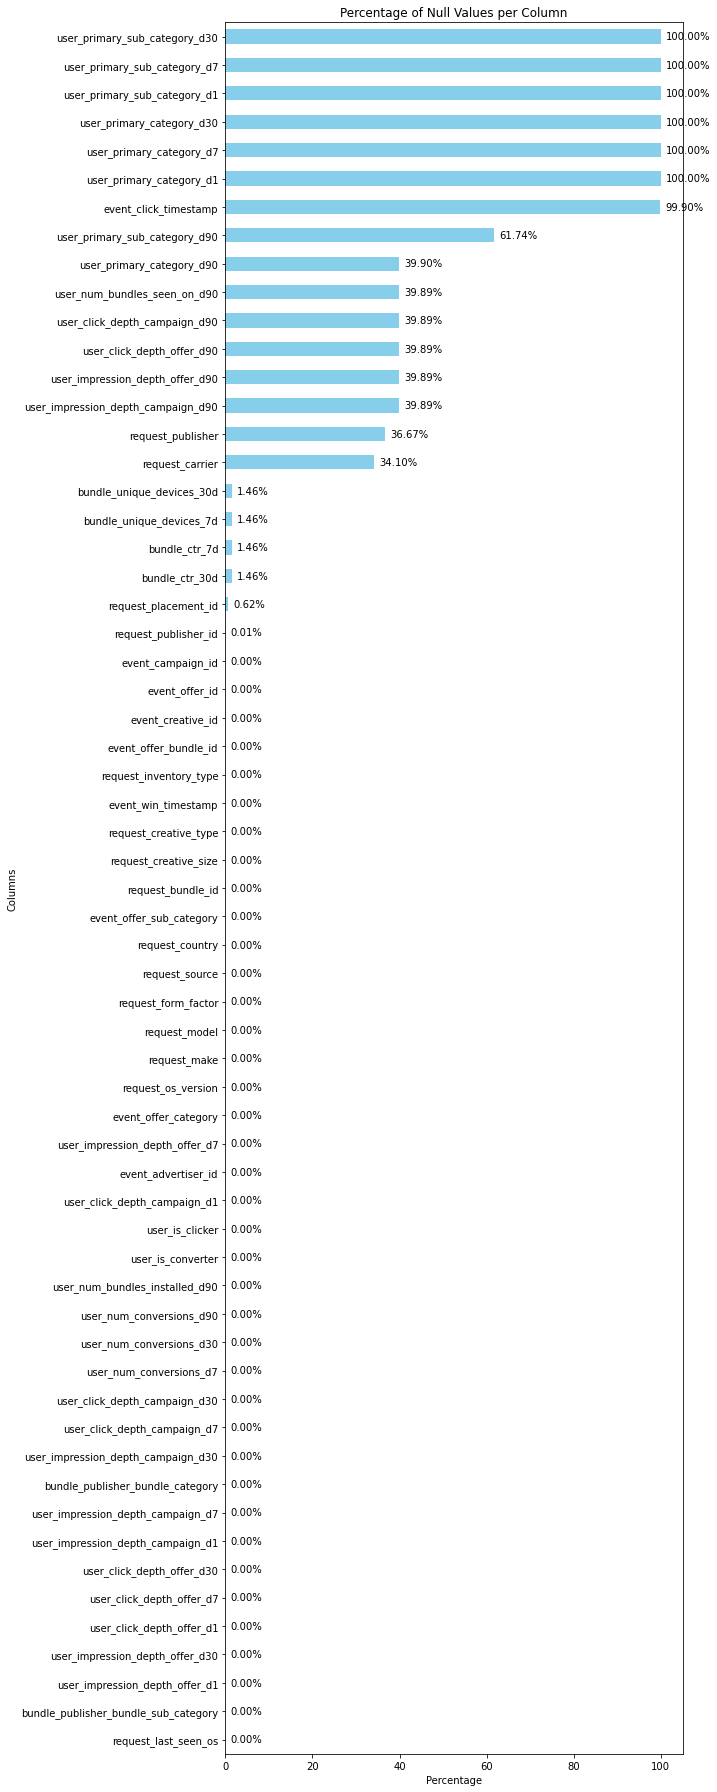

In [8]:
#Let us visualize the Null values

def plot_null_percentage_with_annotations(df):
    # Calculate the percentage of nulls for each column
    null_percentage = (df.isnull().sum() / len(df)) * 100
    
    # Plotting
    ax = null_percentage.sort_values().plot(kind='barh', color='skyblue', figsize=(10, 25))
    plt.title('Percentage of Null Values per Column')
    plt.xlabel('Percentage')
    plt.ylabel('Columns')
    
    # Adding annotations
    for p in ax.patches:
        ax.annotate(f"{p.get_width():.2f}%", (p.get_width(), p.get_y() + p.get_height() / 2),
                    xytext=(5, 0), textcoords='offset points', ha='left', va='center')
    
    plt.tight_layout()  # Adjust layout to fit all labels
    plt.show()

# Use the function to plot the horizontal bar chart with annotations for the 'data' dataframe
plot_null_percentage_with_annotations(data)

In [9]:
# Let us double check that these column have 0 non-null value (incase the graph was rounding)
columns_to_check = ['user_primary_category_d1', 'user_primary_category_d7', 
                    'user_primary_category_d30','user_primary_sub_category_d1', 
                    'user_primary_sub_category_d7', 'user_primary_sub_category_d30']

# Calculate non-null counts for the specified columns
non_null_counts = data[columns_to_check].notnull().sum()

# Display the non-null counts
print(non_null_counts)

user_primary_category_d1         0
user_primary_category_d7         0
user_primary_category_d30        0
user_primary_sub_category_d1     0
user_primary_sub_category_d7     0
user_primary_sub_category_d30    0
dtype: int64


# Observation:
- several columns consist entirely on Null values. We shoudl delete them
- the Click Timestamp is actually a useful one. We will make a Click 1/0 (Target) variable out of it. 

In [10]:
# Drop the columns
               
data = data.drop(columns=columns_to_check)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 55 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   request_last_seen_os                  object 
 1   request_os_version                    object 
 2   request_make                          object 
 3   request_model                         object 
 4   request_form_factor                   object 
 5   request_source                        int64  
 6   request_country                       object 
 7   request_placement_id                  object 
 8   request_publisher_id                  object 
 9   request_publisher                     object 
 10  request_bundle_id                     object 
 11  request_creative_size                 object 
 12  request_creative_type                 object 
 13  request_carrier                       object 
 14  event_win_timestamp                   int64  
 15  event_click_tim

In [12]:
data.to_csv(r"C:\Users\dkaza\Documents\0 Berkeley - ML and AI\0_Capstone\sample_cleaner.csv")

In [14]:
#Let us create a "Target" variable based on the value of "event_click_timestamp". 
#When there is a timestamp, it means that click on the ad happen, which is what we will want to predict. 
data['target'] = np.where(data['event_click_timestamp'].notnull(), 1, 0)

In [17]:
# Let us sample of classes 1 and 0 records for "target"
# Sampling records where 'target' is 1
sample_target_1 = data[data['target'] == 1].sample(n=5)

# Sampling records where 'target' is 0
sample_target_0 = data[data['target'] == 0].sample(n=5)

In [19]:
for column in sample_target_1.columns:
    print(f"Column: {column}")
    print(sample_target_1[column].to_string(index=False))
    print()  

Column: request_last_seen_os
android
android
android
android
android

Column: request_os_version
11
12
11
11
11

Column: request_make
Motorola
 Unknown
 Unknown
  Xiaomi
 Samsung

Column: request_model
  moto g(20)
Mobile Phone
Mobile Phone
Redmi Note 8
    SM-A525M

Column: request_form_factor
Mobile Phone
Mobile Phone
Mobile Phone
Mobile Phone
Mobile Phone

Column: request_source
94038
94038
94038
94038
94038

Column: request_country
US
US
US
US
US

Column: request_placement_id
8c80dbe5c0a94ecacb979192f7a1a6df
55330a1bdcf037177d237ca5999f4399
58a698957bdf5cdc9ed41ff2735acb3e
e8c08ac238917241e67f3f0e60813acc
2e6b438547f991b4b522734678c4100e

Column: request_publisher_id
4dc6a2df21ca908d2997cc981b7ba5c1
dabb702dcfabb75605de9acc9f010bc1
d2d051b4e6837035e0ef499c7eb9ff48
e6b587d4fdfeeab30ae50b8f964237df
f82a3a0c25a97370cb0f2dea35749dda

Column: request_publisher
gosmansissionmeoar
         Ifwe Inc.
      Mentha Games
        SYBO Games
   CYLINDER GLOBAL

Column: request_bundle_id
      

In [20]:
for column in sample_target_0.columns:
    print(f"Column: {column}")
    print(sample_target_1[column].to_string(index=False))
    print()  

Column: request_last_seen_os
android
android
android
android
android

Column: request_os_version
11
12
11
11
11

Column: request_make
Motorola
 Unknown
 Unknown
  Xiaomi
 Samsung

Column: request_model
  moto g(20)
Mobile Phone
Mobile Phone
Redmi Note 8
    SM-A525M

Column: request_form_factor
Mobile Phone
Mobile Phone
Mobile Phone
Mobile Phone
Mobile Phone

Column: request_source
94038
94038
94038
94038
94038

Column: request_country
US
US
US
US
US

Column: request_placement_id
8c80dbe5c0a94ecacb979192f7a1a6df
55330a1bdcf037177d237ca5999f4399
58a698957bdf5cdc9ed41ff2735acb3e
e8c08ac238917241e67f3f0e60813acc
2e6b438547f991b4b522734678c4100e

Column: request_publisher_id
4dc6a2df21ca908d2997cc981b7ba5c1
dabb702dcfabb75605de9acc9f010bc1
d2d051b4e6837035e0ef499c7eb9ff48
e6b587d4fdfeeab30ae50b8f964237df
f82a3a0c25a97370cb0f2dea35749dda

Column: request_publisher
gosmansissionmeoar
         Ifwe Inc.
      Mentha Games
        SYBO Games
   CYLINDER GLOBAL

Column: request_bundle_id
      

In [23]:
#Now let us drop the old Click time stamp column:
data = data.drop(columns=['event_click_timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 55 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   request_last_seen_os                  object 
 1   request_os_version                    object 
 2   request_make                          object 
 3   request_model                         object 
 4   request_form_factor                   object 
 5   request_source                        int64  
 6   request_country                       object 
 7   request_placement_id                  object 
 8   request_publisher_id                  object 
 9   request_publisher                     object 
 10  request_bundle_id                     object 
 11  request_creative_size                 object 
 12  request_creative_type                 object 
 13  request_carrier                       object 
 14  event_win_timestamp                   int64  
 15  event_offer_id 

In [29]:
data.shape

(5000000, 55)

In [30]:
# Count the number of instances in the minority class
count_class_1 = len(data[data['target'] == 1])
print(count_class_1)

4804


In [31]:
#We have a massive class imbalance of over 1000 to 1. Let us undersample class 0 by 1000: 

# Let us reduce the number of Class0 to 5000 (1 to 1000 ratio)
count_class_0_sample = 5000

# Sample from the majority class
data_class_0_sample = data[data['target'] == 0].sample(n=count_class_0_sample, random_state=42)

# Concatenate the minority class with the sampled majority class
undersampled_data = pd.concat([data_class_0_sample, data[data['target'] == 1]], axis=0)

undersampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9804 entries, 4635163 to 4999429
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   request_last_seen_os                  9804 non-null   object 
 1   request_os_version                    9804 non-null   object 
 2   request_make                          9804 non-null   object 
 3   request_model                         9804 non-null   object 
 4   request_form_factor                   9804 non-null   object 
 5   request_source                        9804 non-null   int64  
 6   request_country                       9804 non-null   object 
 7   request_placement_id                  9725 non-null   object 
 8   request_publisher_id                  9804 non-null   object 
 9   request_publisher                     7709 non-null   object 
 10  request_bundle_id                     9804 non-null   object 
 11  request_

In [32]:
undersampled_data.shape

(9804, 55)

In [33]:
#Let us save the undersampled file:
undersampled_data.to_csv(r"C:\Users\dkaza\Documents\0 Berkeley - ML and AI\0_Capstone\undersampled_data.csv")